# **TALLER INTRODUCTORIO A PYTHON**

# Sesión 5 - "Introducción a la estadística en Python" 
El taller aborda los fundamentos del manejo de estadísticas con Python. El objetivo es proporcionar al estudiante los conocimientos fundamentales para realizar las principales tareas estadísticas en Python. Los códigos en Python serán escritos y ejecutados en Jupyter Notebook. Se proporcionarán a los estudiantes las bases de datos necesarias para poder ejecutar los códigos.

En la primera sesión, cubriremos estadísticas descriptivas, proporcionando herramientas para calcular medidas de tendencia central, dispersión y estadísticas resumidas. Luego, profundizaremos en cálculos de probabilidad y técnicas de muestreo, incluyendo tanto con reemplazo como sin reemplazo. Además, introduciremos distribuciones de probabilidad discreta y continua utilizando `scipy.stats`.

#### Fecha: 
16 de agosto
#### Duración: 
7:00pm - 9:00pm
#### Instructor: 
Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

## **Tabla de Contenidos**
- <a href='#t1'>11. Estadísticas Descriptivas en Python</a>
     - <a href='#1.1.'>11.1 Medidas de tendencia central</a>
        - <a href='#1.1.1'>Media</a>
        - <a href='#1.1.2'>Media ponderada</a>
        - <a href='#1.1.3'>Media armónica</a> 
        - <a href='#1.1.4'>Media geométrica</a>
        - <a href='#1.1.5'>Mediana</a>
        - <a href='#1.1.6'>Moda</a> 
     - <a href='#1.2.'>11.2 Medidas de dispersión</a>
        - <a href='#1.2.1'>Varianza</a>
        - <a href='#1.2.2'>Desviación estándar</a>
        - <a href='#1.2.3'>Asimetría</a>
        - <a href='#1.2.4'>Percentiles</a>
     - <a href='#1.3.'>11.3 Resumen de estadísticas descriptivas</a>
- <a href='#t2'>12. Probabilidades en Python</a>
     - <a href='#2.1.'>12.1 Calcular probabilidades</a>
     - <a href='#2.2.'>12.2 Muestreo</a>
- <a href='#t3'>13. Distribuciones con scipy.stats</a>
     - <a href='#3.1.'>13.1 Distribuciones de probabilidad discretas</a>
         - <a href='#3.1.1'>Distribución empírica discreta</a> 
         - <a href='#3.1.2'>Distribución uniforme discreta</a>  
     - <a href='#3.2.'>13.2 Distribuciones de probabilidad continuas</a>
         - <a href='#3.2.1'>Distribución uniforme continua</a>
         - <a href='#3.2.2'>Distribución binomial</a> 
         - <a href='#3.2.3'>Distribución normal</a>

# <a id='t1'> 11. Estadísticas Descriptivas en Python</a>
En este taller, nos embarcamos en un viaje al mundo de la estadística utilizando el versátil lenguaje de programación Python. La estadística desempeña un papel fundamental en la extracción de ideas significativas a partir de los datos, y Python proporciona una plataforma poderosa para realizar análisis estadísticos de manera eficiente. Prepárate para explorar los fundamentos del análisis estadístico, aprender bibliotecas esenciales de Python y adquirir las habilidades para tomar decisiones informadas basadas en datos. Para este curso, principalmente utilizaremos las bibliotecas numpy y pandas.

## <a id='1.1.'> 11.1 Medidas de tendencia central </a>
En esta sección, nos adentramos en el concepto fundamental de las "Medidas de Tendencia Central". En el corazón del análisis estadístico, estas medidas proporcionan un resumen del valor central o promedio dentro de un conjunto de datos, ofreciendo información crucial sobre sus tendencias centrales. Exploraremos tres medidas principales: la **media**, que representa el promedio aritmético; la **mediana**, que identifica el valor central; y la **moda**, que representa el valor más frecuente. Primero utilizaremos **arrays de numpy** para aplicar estas funciones. Luego, utilizaremos una base de datos que contiene datos macroeconómicos de Perú.

In [1]:
>>> import math
>>> import statistics
>>> import numpy as np
>>> from scipy import stats
>>> import scipy
>>> import pandas as pd
>>> import matplotlib.pyplot as plt

In [2]:
# We create an list and the same list with a nan value
>>> x = [8.0, 1, 2.5, 4, 28.0]
>>> x_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]

In [3]:
# Alternatively
>>> x_nan = [8.0, 1, 2.5, np.nan, 4, 28.0]

In [4]:
# We create their array and series versions
>>> y, y_nan = np.array(x), np.array(x_nan)
>>> z, z_nan = pd.Series(x), pd.Series(x_nan)

### <a id='1.1.1'> Media </a>
Podemos calcular la media dividiendo la suma entre la longitud. Esto no funciona si incluimos el valor NaN. Las funciones ```mean()``` y ```fmean()``` retornan el mismo valor de una manera más elegante. ```fmean()``` siempre devuelve un número flotante y es más rápido que ```mean()```.

In [5]:
# We can calculate the mean dividing the sum againts the length
mean = sum(x) / len(x)
print(mean)

8.7


In [6]:
# This does not work if we include the nan value
mean = sum(x_nan) / len(x_nan)
print(mean)

nan


In [7]:
# We can apply Python built-in functions of the statistics package
mean = statistics.mean(x)
print(mean)
mean = statistics.fmean(x)
print(mean)

8.7
8.7


In [8]:
# But they do not work wit nan values
mean = statistics.mean(x_nan)
print(mean)
mean = statistics.fmean(x_nan)
print(mean)

nan
nan


Numpy también nos ofrece las funciones ```np.mean()``` y ```np.nanmean()```, así como el método ```.mean()```.


In [9]:
# We can also use the numpy function on lists
mean = np.mean(x)
print(mean)
mean = np.mean(x_nan)
print(mean)

8.7
nan


In [10]:
# We can also use numpy method on arrays
mean = y.mean()
print(mean)
mean = y_nan.mean()
print(mean)

8.7
nan


In [11]:
# We can also use numpy method on series. The pandas method authomatically ignores nan values
mean = z.mean()
print(mean)
mean = z_nan.mean()
print(mean)

8.7
8.7


In [12]:
# We can do the same for lists and arrays for nanmean()
print(np.nanmean(y_nan))
print(np.nanmean(x_nan))

8.7
8.7


### <a id='1.1.2'> Media ponderada </a>
La media ponderada, o promedio ponderado, es una extensión de la media regular en estadística. Nos permite asignar diferentes pesos a los puntos de datos individuales, indicando su impacto variable en el resultado general. Puedes calcular la media ponderada con funciones integradas de Python combinando ```sum()``` con ```range()``` o ```zip()```.

In [13]:
# We define the values and their weights
>>> x = [8.0, 1, 2.5, 4, 28.0]
>>> w = [0.1, 0.2, 0.3, 0.25, 0.15]
# We calculate the weighted mean
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

6.95


In [14]:
# Alternatively
wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95


También puedes usar ```np.average()``` para obtener la media ponderada de arrays de NumPy o Series de pandas.

In [15]:
# We calculate the weighted mean of an array
wmean = np.average(y, weights=w)
print(wmean)

6.95


In [16]:
# We calculate the weighted mean of a pandas series
wmean = np.average(z, weights=w)
print(wmean)

6.95


Un enfoque alternativo implica utilizar el producto elemento a elemento de w * y y luego aplicar ```np.sum()``` o ```.sum()``` de esta forma ```(w * y).sum() / w.sum().```

In [17]:
w = np.array(w)
(w * y).sum() / w.sum()

np.float64(6.95)

Esto no funciona cuando los datos contienen valores NaN.


In [18]:
w = np.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
wmean = np.average(y_nan, weights=w)
print(wmean)
wmean = np.average(z_nan, weights=w)
print(wmean)

nan
nan


### <a id='1.1.3'> Media Armónica </a>
La media armónica, a diferencia de la media ponderada, resalta la importancia de los valores más pequeños en un conjunto de datos. La media armónica tiene en cuenta los valores recíprocos, lo que la hace especialmente útil en escenarios donde las tasas o relaciones juegan un papel crucial. Su fórmula se expresa como
$$
\frac{n}{\sum_i \left(\frac{1}{x_i}\right)}, \text{donde } i = 1, 2, ..., n
$$

En Python, puedes calcular fácilmente la media armónica utilizando funciones como ```scipy.stats.hmean()``` o ```statistics.harmonic_mean(x)```.

In [19]:
x = [8.0, 1, 2.5, 4, 28.0]
hmean = len(x) / sum(1 / item for item in x)
print(hmean)

2.7613412228796843


In [20]:
# We can use scipy
hmean = stats.hmean(x)
print(hmean)

2.7613412228796843


In [21]:
# Or we can use the built-in statistics package
hmean = statistics.harmonic_mean(x)
print(hmean)

2.7613412228796843


In [22]:
# If there is a nan value it returns nan
statistics.harmonic_mean(x_nan)

nan

In [23]:
# If there is a 0 it returns 0
statistics.harmonic_mean([1, 0, 2])

0

In [24]:
# If there a negative number, it returns an error
#statistics.harmonic_mean([1, 2, -2]) 

In [25]:
# We can apply it to arrays and pandas series
print(stats.hmean(y))
print(stats.hmean(z))

2.7613412228796843
2.7613412228796843


### <a id='1.1.4'> Media Geométrica </a>
La media geométrica se expresa matemáticamente como la raíz n-ésima del producto de todos los n elementos \( x_i \) en un conjunto de datos \( x \):

$$ \sqrt[n]{\prod_{i=1}^{n} x_i}, \text{donde } (i = 1, 2, \ldots, n) $$

Puedes incorporar la media geométrica usando Python puro de la siguiente manera

In [26]:
gmean = 1
for item in x:
     gmean *= item

gmean **= 1 / len(x)
print(gmean)

4.677885674856041


Además, podemos usar ```statistics.geometric_mean()```

In [27]:
# We can also use the statistics built-in function
gmean = statistics.geometric_mean(x)
gmean

4.67788567485604

In [28]:
# Doesn't work with nan values
gmean = statistics.geometric_mean(x_nan)
gmean

nan

También puedes obtener la media geométrica usando ```scipy.stats.gmean()``` en arrays y series de pandas.

In [29]:
print(stats.gmean(y))

print(stats.gmean(y_nan))

4.67788567485604
nan


In [30]:
print(stats.gmean(z))

print(stats.gmean(z_nan))

4.67788567485604
nan


### <a id='1.1.5'> Mediana </a>
La mediana de una muestra corresponde al elemento central del conjunto de datos ordenado, sin importar si la ordenación se realiza en orden ascendente o descendente. Para un número impar de elementos $((n))$, la mediana es el valor en la posición central, específicamente en $0.5((n + 1))$. En el caso de un número par de elementos, la mediana se determina tomando el promedio de los dos valores centrales ubicados en las posiciones $0.5(n)$ y $0.5(n + 1)$.

In [31]:
x = [8.0, 1, 2.5, 4, 28.0]
x_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
y, y_nan = np.array(x), np.array(x_nan)
z, z_nan = pd.Series(x), pd.Series(x_nan)

Esta función ```calculate_median()``` toma un conjunto de datos como entrada, lo ordena y calcula la mediana, considerando conjuntos de datos de longitud impar y par.

In [32]:
def calculate_median(data):
    n = len(data)
    sorted_data = sorted(data)

    if n % 2:
        median_value = sorted_data[round(0.5 * (n - 1))]
    else:
        index = round(0.5 * n)
        median_value = 0.5 * (sorted_data[index - 1] + sorted_data[index])

    return median_value

median_ = calculate_median(x)
print("Median:", median_)

Median: 4


También podemos usar la función ```statistics.median()```. La forma ordenada de x, [1, 2.5, 4, 8.0, 28.0], coloca a 4 en la posición central. Al eliminar el último elemento (28.0) de x, la versión ordenada se convierte en [1, 2.5, 4, 8.0]. En este caso, con dos elementos centrales, 2.5 y 4, su promedio es 3.25.

In [33]:
median_ = statistics.median(x)
median_

4

In [34]:
median_ = statistics.median(x[:-1])
median_

3.25

Además, podemos usar ```statistics.median_low()``` y ```statistics.median_high()```. Cuando el número de elementos es impar, estas funciones operan de manera similar a ```median()```, ya que hay un valor central único. Sin embargo, si el conteo es par, ```median_low()``` devuelve el valor central más bajo, mientras que ```median_high()``` proporciona el valor central más alto.

In [35]:
# median_low will return 2.5
median_ = statistics.median_low(x[:-1])
median_

2.5

In [36]:
# median_high will return 4
median_ = statistics.median_high(x[:-1])
median_

4

Estas funciones funcionan bien con NaN, a diferencia de la mayoría de otras funciones.

In [37]:
print(statistics.median(x_nan))
print(statistics.median_low(x_nan))
print(statistics.median_high(x_nan))

6.0
4
8.0


Podemos usar Numpy de manera similar con ```np.median()```, obteniendo los mismos resultados para listas, arrays y Series.

In [38]:
median_ = np.median(y)
print(median_)

median_ = np.median(z[:-1])
print(median_)

4.0
3.25


En caso de que queramos incluir valores NaN, entonces utilizamos ```np.nanmedian()```.


In [39]:
median_ = np.nanmedian(y_nan)
print(median_)

median_ = np.nanmedian(z_nan[:-1])
print(median_)

4.0
3.25


Finalmente, tenemos el método de pandas Series ```.median()``` que ignora los valores NaN de manera predeterminada.

In [40]:
print(z.median())
print(z_nan.median())

4.0
4.0


### <a id='1.1.6'> Moda </a>  
La moda en una muestra se refiere al valor que aparece con mayor frecuencia en el conjunto de datos. Si no hay un valor único con la frecuencia más alta, el conjunto de datos se considera multimodal, ya que contiene múltiples valores modales. Podemos obtener fácilmente la moda de esta manera:

In [41]:
u = [6, 3, 6, 9, 12, 9, 6]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

6

También podemos obtener la moda con ```statistics.mode()``` y ```statistics.multimode()```.

In [42]:
mode_ = statistics.mode(u)
mode_

6

In [43]:
u = [6, 3, 6, 9, 12, 9, 6, 9]
mode_ = statistics.multimode(u)
mode_

[6, 9]

In [44]:
v = [11, 13, 11, 13, 17, 13, 11]
mode_ = statistics.multimode(v)
mode_

[11, 13]

Ambas funciones manejan valores NaN como valores regulares y pueden devolver NaN como el valor modal.

In [45]:
statistics.multimode([2, math.nan, 2, math.nan, 5])

[2, nan]

También puedes obtener la moda con ```scipy.stats.mode()```.


In [46]:
u = np.array(u)
mode_ = stats.mode(u)
mode_

ModeResult(mode=np.int64(6), count=np.int64(3))

Podemos obtener la moda y su número de ocurrencias como arrays de NumPy con notación de punto.


In [47]:
print(mode_.mode)
print(mode_.count)

6
3


Las Series de pandas tienen el método ```.mode()``` que maneja bien los valores multimodales y por defecto ignora los valores NaN.


In [48]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    6
1    9
dtype: int64
0    11
1    13
dtype: int64
0    2.0
dtype: float64


## <a id='1.1.'> 11.2 Medidas de dispersión </a>
En esta sección, exploramos las herramientas esenciales que nos ayudan a entender la variabilidad y dispersión dentro de un conjunto de datos. Medidas como el rango, la varianza y la desviación estándar proporcionan información sobre cómo se distribuyen los puntos de datos alrededor de la tendencia central. Al usar estas medidas de dispersión, obtendrás una comprensión más profunda de la distribución de los datos, lo que te permitirá tomar decisiones informadas y extraer conclusiones significativas de tus análisis estadísticos.

### <a id='1.2.1'> Varianza </a>  

La varianza muestral mide cómo están dispersos los datos, indicando numéricamente la distancia de los puntos de datos respecto a la media. Matemáticamente, la varianza muestral de un conjunto de datos \( x \) con \( n \) elementos se expresa como

$$ s^2 = \frac{\sum_{i}(x_i - \text{mean}(x))^2}{(n - 1)} $$

donde \( i = 1, 2, ..., n \) y \( \text{mean}(x) \) representa la media muestral de \( x \).

Aquí tienes un método para calcular la varianza muestral usando solo Python sin librerías:

In [49]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.2

Si bien este enfoque es efectivo y calcula con precisión la varianza muestral, una solución más concisa y elegante sería utilizar la función existente `statistics.variance()`.


In [50]:
var_ = statistics.variance(x)
var_

123.2

Si tus datos contienen valores NaN, usar `statistics.variance()` hará que la función devuelva NaN. Esto es consistente con `mean()` y la mayoría de otras funciones dentro de la biblioteca de estadísticas de Python.

In [51]:
statistics.variance(x_nan)

nan

Otra opción para calcular la varianza muestral es utilizando NumPy. Puedes utilizar tanto la función `np.var()` como su método correspondiente `.var()`. Es crucial especificar el parámetro `ddof=1` para establecer los grados de libertad delta en 1. Este parámetro asegura el cálculo correcto de $s^2$, donde se usa $(n - 1)$ en el denominador en lugar de $n$.

In [52]:
var_ = np.var(y, ddof=1)
print(var_)

var_ = y.var(ddof=1)
print(var_)

123.19999999999999
123.19999999999999


Si tenemos valores NaN en el conjunto de datos, entonces `np.var()` y `.var()` devolverán NaN.

In [53]:
print(np.var(y_nan, ddof=1))

print(y_nan.var(ddof=1))

nan
nan


La función `np.nanvar()` en NumPy ignora los valores NaN y también requiere que especifiques `ddof=1`.

Para los objetos `pd.Series`, el método `.var()` omite los valores NaN por defecto.

In [54]:
print(z.var(ddof=1))

print(z_nan.var(ddof=1))

123.19999999999999
123.19999999999999


El cálculo de la varianza poblacional se asemeja al de la varianza muestral, pero con una ligera diferencia en el denominador:
$$
\frac{\sum_{i}(x_i - \text{mean}(x))^2}{n}
$$
donde $n$ representa el número de elementos en toda la población. Para calcular la varianza poblacional:

En la implementación en Python puro, reemplaza $(n - 1)$ por $n$.
Utiliza `statistics.pvariance()` en lugar de `statistics.variance()` para el módulo de estadísticas de Python.
Para NumPy o pandas, especifica el parámetro `ddof=0`. En NumPy, puedes omitir `ddof` porque su valor predeterminado es 0.

### <a id='1.2.2'> Desviación estándar </a>  
La desviación estándar mide la dispersión o dispersión de los puntos de datos alrededor del valor medio. Proporciona una indicación numérica de cuánto se desvían los puntos de datos individuales de la media. Matemáticamente, la desviación estándar de un conjunto de datos se puede calcular tomando la raíz cuadrada de la varianza. Al igual que la varianza, la desviación estándar ayuda a comprender la distribución de los datos y a evaluar la consistencia o variabilidad dentro del conjunto de datos.


Lo puedes calcular en Python

In [55]:
std_ = var_ ** 0.5
std_

np.float64(11.099549540409285)

También puedes usar `statistics.stdev()`


In [56]:
std_ = statistics.stdev(x)
std_

11.099549540409287

Puedes calcular la desviación estándar usando NumPy de manera similar. Tanto la función `std()` como su método correspondiente `.std()` pueden emplearse para este propósito. En caso de que haya valores NaN dentro del conjunto de datos, estos resultarán en resultados NaN.


In [57]:
print(np.std(y, ddof=1))

print(y.std(ddof=1))

print(np.std(y_nan, ddof=1))

print(y_nan.std(ddof=1))

11.099549540409285
11.099549540409285
nan
nan


Para ignorar estos valores NaN, puedes utilizar `np.nanstd()`. Esencialmente, el uso de `std()`, `.std()` y `nanstd()` en NumPy es similar al de `var()`, `.var()` y `nanvar()`.


In [58]:
print(np.nanstd(y_nan, ddof=1))

11.099549540409285


Además, los objetos `pd.Series` ofrecen el método `.std()`, que excluye automáticamente los valores NaN.


In [59]:
print(z.std(ddof=1))

print(z_nan.std(ddof=1))

11.099549540409285
11.099549540409285


La desviación estándar poblacional abarca la totalidad de la población. Representa la raíz cuadrada positiva de la varianza poblacional. Para calcularla, sigue un procedimiento similar al de la desviación estándar muestral, con algunas diferencias:

1. Toma la raíz cuadrada de la varianza poblacional en el enfoque de Python puro.
2. Utiliza `statistics.pstdev()` en lugar de `statistics.stdev()` para el módulo de estadísticas de Python.
3. Al usar NumPy o pandas, especifica `ddof=0`. En NumPy, puedes omitir `ddof` ya que su valor predeterminado es 0.


### <a id='1.2.3'> Asimetría </a> 
La asimetría muestral mide la asimetría de una muestra de datos. Se mide como
$$
Skew = \frac{n}{(n-1)(n-2)} \times \sum_{i=1}^{n} \left( \frac{X_i - \text{mean}(X)}{\text{std}(X)} \right)^3
$$



In [60]:
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x)
         * n / ((n - 1) * (n - 2) * std_**3))
skew_

1.947043227390592

La asimetría positiva indica que hay una cola en el lado derecho de la distribución de $x$.

También podemos calcular la asimetría muestral con `scipy.stats.skew()`.


In [61]:
y, y_nan = np.array(x), np.array(x_nan)
print(scipy.stats.skew(y, bias=False))

print(scipy.stats.skew(y_nan, bias=False))

1.9470432273905927
nan


El parámetro bias se configura como False para activar los ajustes por sesgo estadístico. El parámetro nan_policy, que es opcional, acepta tres valores: 'propagate', 'raise' u 'omit'. Este parámetro proporciona control sobre el manejo de los valores NaN.

El método `.skew()` de los objetos Series de pandas también proporciona la asimetría de un conjunto de datos.

In [62]:
z, z_nan = pd.Series(x), pd.Series(x_nan)
print(z.skew())

print(z_nan.skew())

1.9470432273905924
1.9470432273905924


### <a id='1.2.4'> Percentiles </a>

El percentil $p$ de la muestra indica el elemento dentro del conjunto de datos tal que $p\%$ de los elementos del conjunto son menores o iguales a ese valor, y $(100 − p)\%$ de los elementos son mayores o iguales a él. Si existen dos elementos de este tipo en el conjunto de datos, el percentil $p$ de la muestra es su media aritmética. Cada conjunto de datos comprende tres cuartiles, que representan los percentiles que dividen el conjunto de datos en cuatro segmentos:

- El primer cuartil corresponde al percentil 25 de la muestra, segregando aproximadamente el 25% de los elementos más pequeños del resto del conjunto de datos.
- El segundo cuartil, también conocido como el percentil 50 de la muestra o la mediana, se encuentra entre el primer y segundo cuartil, con aproximadamente el 25% de los elementos entre cada cuartil.
- El tercer cuartil indica el percentil 75 de la muestra, dividiendo aproximadamente el 25% de los elementos más grandes del resto del conjunto de datos.

In [63]:
x = np.arange(1, 101, 1)
print(statistics.quantiles(x, n=2))

print(statistics.quantiles(x, n=4, method='inclusive'))

[np.float64(50.5)]
[np.float64(25.75), np.float64(50.5), np.float64(75.25)]


En este ejemplo, 8.0 es la mediana de $x$, mientras que 0.1 y 21.0 son los percentiles 25 y 75 del conjunto de datos, respectivamente. El parámetro $n$ define la cantidad de percentiles de igual probabilidad resultantes, y el método determina cómo calcularlos.

In [64]:
y = np.array(x)
print(np.percentile(y, 5))

print(np.percentile(y, 95))

5.95
95.05


La función `percentile()` requiere varios argumentos. El conjunto de datos debe ser proporcionado como el primer argumento, seguido del valor del percentil como el segundo argumento. El conjunto de datos puede estar en formato de array de `NumPy`, lista, tupla o estructura de datos comparable. El valor del percentil puede variar de 0 a 100, como se ilustró en el ejemplo anterior. Sin embargo, también puede ser una secuencia de números.

In [65]:
np.percentile(y, [25, 50, 75])

array([25.75, 50.5 , 75.25])

Este código calcula simultáneamente los percentiles 25, 50 y 75.

Si prefieres ignorar los valores NaN, deberías utilizar `np.nanpercentile()` en su lugar.

In [66]:
y_nan = np.array([1, 2, 3, 4, 5, np.nan])

print(np.percentile(y_nan, [25, 50, 75]))
print(np.nanpercentile(y_nan, [25, 50, 75]))

[nan nan nan]
[2. 3. 4.]


NumPy proporciona una funcionalidad similar a través de `quantile()` y `nanquantile()`. Al usar estas funciones, debes especificar los valores de cuantil como números entre 0 y 1, en lugar de como percentiles.

In [67]:
print(np.quantile(y, 0.05))

print(np.quantile(y, 0.95))

print(np.quantile(y, [0.25, 0.5, 0.75]))

print(np.nanquantile(y_nan, [0.25, 0.5, 0.75]))

5.95
95.05
[25.75 50.5  75.25]
[2. 3. 4.]


Los objetos Series de Pandas también poseen el método `.quantile()`.

In [68]:
z, z_nan = pd.Series(y), pd.Series(y_nan)

print(z.quantile(0.05))

print(z.quantile(0.95))

5.95
95.05


Funciona automáticamente con valores NaN.

In [69]:
print(z.quantile([0.25, 0.5, 0.75]))

print(z_nan.quantile([0.25, 0.5, 0.75]))

0.25    25.75
0.50    50.50
0.75    75.25
dtype: float64
0.25    2.0
0.50    3.0
0.75    4.0
dtype: float64


## <a id='1.3.'> 11.3 Resumen de estadísticas descriptivas </a>

Puedes utilizar SciPy y pandas para obtener estadísticas descriptivas de manera eficiente con una sola llamada a una función o método. Por ejemplo, puedes usar `scipy.stats.describe()` como veremos en esta subsección

### Ahora trabajemos con un dataframe con datos de Perú

In [70]:
# We read and transform the database
>>> peru = pd.read_excel('../Datasets/peru.xlsx', parse_dates=['Year'])
>>> peru = peru.drop(columns=['Unnamed: 0', 'Country'])
>>> peru.set_index('Year', inplace=True)

In [71]:
# We analize it
peru.head()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
Year,,,,,,
1980-01-01,-5.175,NaN,NaN,7.326,59.145,0.43875
1981-01-01,-9.673,NaN,NaN,6.800,75.433,0.43875
1982-01-01,-9.142,NaN,NaN,6.400,64.460,0.43875
1983-01-01,-6.842,NaN,NaN,9.000,111.149,0.43875
1984-01-01,-1.381,NaN,NaN,8.900,110.209,0.43875


In [72]:
# We further analyse it with the describe() function
peru.describe()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
count,42.000000,22.000000,22.000000,42.000000,41.000000,41.000000
mean,-3.368333,17.760636,21.070182,7.779119,315.795195,0.702226
std,3.052220,13.084920,1.740462,1.752538,1266.240395,0.171591
min,-9.673000,1.499000,18.593000,4.156000,0.192000,0.438750
25%,-5.428250,7.350000,19.901500,6.710500,2.804000,0.438750
50%,-2.966000,12.611500,20.948500,7.863500,3.759000,0.811250
75%,-1.285000,29.997250,21.466000,8.975000,73.529000,0.811250
max,3.331000,38.672000,26.862000,13.000000,7481.691000,0.811250


In [73]:
peru.count()

Current account balance                 42
General government net debt             22
General government total expenditure    22
Unemployment rate                       42
CPI                                     41
CBI                                     41
dtype: int64

In [74]:
peru.mean()

Current account balance                  -3.368333
General government net debt              17.760636
General government total expenditure     21.070182
Unemployment rate                         7.779119
CPI                                     315.795195
CBI                                       0.702226
dtype: float64

In [75]:
peru.max()

Current account balance                    3.33100
General government net debt               38.67200
General government total expenditure      26.86200
Unemployment rate                         13.00000
CPI                                     7481.69100
CBI                                        0.81125
dtype: float64

In [76]:
peru.min()

Current account balance                 -9.67300
General government net debt              1.49900
General government total expenditure    18.59300
Unemployment rate                        4.15600
CPI                                      0.19200
CBI                                      0.43875
dtype: float64

We can equally inspect it using the numpy library. We can use np.mean(), np.median() and stats.mode()

In [77]:
print(f'La media del saldo de cuenta corriente es {np.mean(peru["Current account balance"])}')
print(f'La media de la deuda neta del gobierno general es {np.mean(peru["General government net debt"])}')
print(f'La media del gasto total del gobierno general es {np.mean(peru["General government total expenditure"])}')
print(f'La media de la tasa de desempleo es {np.mean(peru["Unemployment rate"])}')
print(f'La media del IPC es {np.mean(peru["CPI"])}')
print(f'La media del ICB es {np.mean(peru["CBI"])}')

La media del saldo de cuenta corriente es -3.368333333333333
La media de la deuda neta del gobierno general es 17.760636363636365
La media del gasto total del gobierno general es 21.07018181818182
La media de la tasa de desempleo es 7.779119047619046
La media del IPC es 315.7951951219512
La media del ICB es 0.7022256097560977


In [78]:
print(f'La mediana del saldo de cuenta corriente es {np.median(peru["Current account balance"])}')
print(f'La mediana de la deuda neta del gobierno general es {np.median(peru["General government net debt"])}')
print(f'La mediana del gasto total del gobierno general es {np.median(peru["General government total expenditure"])}')
print(f'La mediana de la tasa de desempleo es {np.median(peru["Unemployment rate"])}')
print(f'La mediana del IPC es {np.median(peru["CPI"])}')
print(f'La mediana del ICB es {np.median(peru["CBI"])}')

La mediana del saldo de cuenta corriente es -2.966
La mediana de la deuda neta del gobierno general es nan
La mediana del gasto total del gobierno general es nan
La mediana de la tasa de desempleo es 7.8635
La mediana del IPC es nan
La mediana del ICB es nan


In [79]:
import warnings
warnings.filterwarnings("ignore")

print(f'La moda del saldo de cuenta corriente es {stats.mode(peru["Current account balance"])[0]}')
print(f'La moda de la deuda neta del gobierno general es {stats.mode(peru["General government net debt"])[0]}')
print(f'La moda del gasto total del gobierno general es {stats.mode(peru["General government total expenditure"])[0]}')
print(f'La moda de la tasa de desempleo es {stats.mode(peru["Unemployment rate"])[0]}')
print(f'La moda del IPC es {stats.mode(peru["CPI"])[0]}')
print(f'La moda del ICB es {stats.mode(peru["CBI"])[0]}')

La moda del saldo de cuenta corriente es -9.673
La moda de la deuda neta del gobierno general es nan
La moda del gasto total del gobierno general es nan
La moda de la tasa de desempleo es 9.4
La moda del IPC es 0.192
La moda del ICB es 0.81125


### ¿Qué hacemos con los valores nans ?

In [80]:
# We can either fill them with 0s 
peru_filled = peru.fillna(0)
peru_filled.head()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
Year,,,,,,
1980-01-01,-5.175,0.0,0.0,7.326,59.145,0.43875
1981-01-01,-9.673,0.0,0.0,6.800,75.433,0.43875
1982-01-01,-9.142,0.0,0.0,6.400,64.460,0.43875
1983-01-01,-6.842,0.0,0.0,9.000,111.149,0.43875
1984-01-01,-1.381,0.0,0.0,8.900,110.209,0.43875


In [81]:
# Or drop the observations with nans
peru_dropped = peru.dropna()
peru_dropped.head()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
Year,,,,,,
2000-01-01,-3.064,37.680,21.735,7.847,3.759,0.81125
2001-01-01,-2.351,37.060,20.934,9.246,1.975,0.81125
2002-01-01,-2.031,38.128,19.649,9.420,0.192,0.81125
2003-01-01,-1.592,38.672,20.113,9.424,2.261,0.81125
2004-01-01,0.094,34.958,19.558,9.436,3.662,0.81125


In [82]:
# We can't use interpolate because of the large number of missing values at the beggining of the dataset
peru_interpolated = peru.interpolate(method='nearest').head()
peru_interpolated.head()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
Year,,,,,,
1980-01-01,-5.175,NaN,NaN,7.326,59.145,0.43875
1981-01-01,-9.673,NaN,NaN,6.800,75.433,0.43875
1982-01-01,-9.142,NaN,NaN,6.400,64.460,0.43875
1983-01-01,-6.842,NaN,NaN,9.000,111.149,0.43875
1984-01-01,-1.381,NaN,NaN,8.900,110.209,0.43875


In [83]:
peru_dropped.describe()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
count,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01
mean,-1.538429,17.664095,20.952190,8.064381,2.657238,8.112500e-01
std,2.203459,13.400022,1.690879,1.653685,1.197392,1.137640e-16
min,-4.814000,1.499000,18.593000,5.938000,0.192000,8.112500e-01
25%,-2.868000,6.912000,19.831000,6.742000,1.827000,8.112500e-01
50%,-1.975000,12.175000,20.946000,7.880000,2.804000,8.112500e-01
75%,-0.520000,31.966000,21.352000,9.246000,3.548000,8.112500e-01
max,3.331000,38.672000,26.862000,13.000000,5.788000,8.112500e-01


In [84]:
peru_filled.describe()

,Current account balance,General government net debt,General government total expenditure,Unemployment rate,CPI,CBI
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,-3.368333,9.303190,11.036762,7.779119,308.276262,0.685506
std,3.052220,12.972889,10.723288,1.752538,1251.651998,0.201162
min,-9.673000,0.000000,0.000000,4.156000,0.000000,0.000000
25%,-5.428250,0.000000,0.000000,6.710500,2.396750,0.438750
50%,-2.966000,2.088000,18.877500,7.863500,3.710500,0.811250
75%,-1.285000,12.829750,20.949750,8.975000,71.261750,0.811250
max,3.331000,38.672000,26.862000,13.000000,7481.691000,0.811250


# <a href='#t2'>12. Probabilidades</a>

## <a id='2.1.'> 12.1 Calculando probabilidades </a> 
Analizamos el dataframe de negocios, que muestra los negocios que un empleado hizo con diferentes clientes durante el último año. Contiene la siguiente información:
- producto: producto del negocio
- cliente: Nuevo o Actual
- estado: Ganado o Perdido
- monto: monto del negocio
- num_usuarios: número de usuarios del producto

Calculemos la probabilidad de seleccionar un negocio para los diferentes tipos de productos.


In [85]:
>>> deals = pd.read_csv('../Datasets/deals.csv')
>>> deals.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


In [86]:
# We first count the number of deals with each product
counts = deals['product'].value_counts()
counts

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64

In [87]:
# We calculate probability of picking a deal with each product
probs = counts / counts.sum()
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [88]:
# We sum the probabilities and get 1 or 100% 
round(probs.sum(), 2)

np.float64(1.0)

## <a id='2.2.'> 12.2 Muestreo </a> 
Supongamos que queremos seleccionar aleatoriamente diez negocios para poder comunicarnos con cada cliente y preguntarles si estaban satisfechos con el servicio que recibieron. Vamos a realizar un muestreo tanto con reemplazo como sin reemplazo utilizando el método ```sample```.

In [89]:
# We set a random seed so we can repeat the experiment
np.random.seed(42)

In [90]:
sample_without_replacement = deals.sample(10, replace = False)
sample_without_replacement

,product,client,status,amount,num_users
19,Product I,Current,Won,3220.45,45
45,Product B,Current,Won,8614.12,17
140,Product B,Current,Lost,5856.18,45
30,Product C,New,Won,6151.14,66
67,Product B,Current,Won,4571.26,19
16,Product D,Current,Won,5282.57,58
119,Product B,Current,Won,1597.44,37
174,Product D,Current,Won,6377.50,12
109,Product H,Current,Won,5257.16,22
141,Product B,Current,Won,4795.64,8


In [91]:
# We set a random seed so we can repeat the experiment
np.random.seed(42)

# We sample 10 deals with replacement
sample_with_replacement = deals.sample(10, replace = True)
sample_with_replacement

,product,client,status,amount,num_users
102,Product D,New,Lost,1196.53,63
92,Product A,Current,Won,4509.96,92
14,Product B,Current,Lost,7030.54,41
106,Product H,Current,Won,4547.97,13
71,Product A,Current,Won,5945.63,55
20,Product F,Current,Lost,6849.12,19
102,Product D,New,Lost,1196.53,63
121,Product B,Current,Won,4831.73,12
74,Product D,Current,Lost,4274.80,9
87,Product C,Current,Won,3579.63,3


Dado que queremos obtener el mayor número posible de opiniones variadas, en este ejemplo, sería mejor hacer un muestreo sin reemplazo.


# <a id='t3'>13. Distribuciones usando scipy.stats</a>


Más información de scipy.stats: https://docs.scipy.org/doc/scipy/reference/stats.html

## <a id='3.1.'> 13.1 Distribuciones de probabilidad discretas </a> 
Una distribución de probabilidad es una función matemática que describe la probabilidad de obtener diferentes resultados posibles en un experimento o proceso aleatorio. Proporciona una forma de modelar la incertidumbre y la aleatoriedad en varios campos como la estadística, la teoría de probabilidades y el aprendizaje automático. Las distribuciones de probabilidad pueden ser discretas o continuas, dependiendo de la naturaleza de la variable aleatoria que describen. Veremos distribuciones discretas. Primero, con un ejemplo de una distribución empírica y luego, una distribución uniforme de dados.


### <a id='3.1.1'> Distribución empírica discreta </a>  


In [92]:
data = {'group_id': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
        'group_size': [3, 5, 6, 2, 4, 2, 3, 2, 5, 2, 3, 7]}

data = pd.DataFrame(data)

Supongamos que tenemos 12 grupos diferentes y queremos seleccionarlos aleatoriamente. Veamos la distribución de probabilidad de que se elijan grupos de diferentes tamaños.

Primero, creamos un histograma de la columna `group_size` para ver cómo está distribuida. Podemos ver que la mayoría de los grupos consisten en solo 2 o 3 personas.

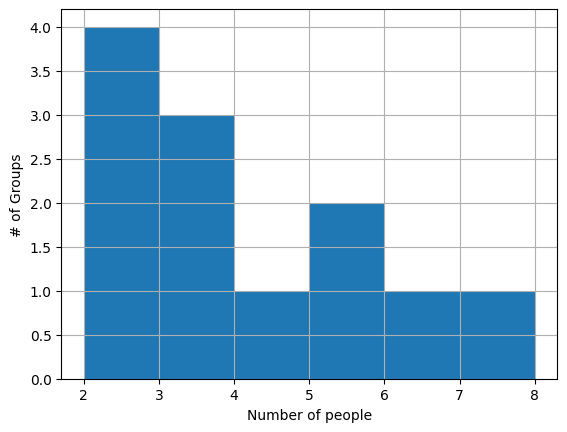

In [93]:
data['group_size'].hist(bins = [2, 3, 4, 5, 6, 7, 8])
plt.ylabel('# of Groups')
plt.xlabel('Number of people')
plt.show()

Luego, contamos las ocurrencias de cada `group_size` en `restaurant_groups`. Posteriormente, dividimos por el número total de filas en `restaurant_groups` para determinar la probabilidad asociada con seleccionar aleatoriamente un grupo de cada tamaño. Los resultados se almacenan en un DataFrame llamado `size_dist`. Después de esto, restablecemos el índice de `size_dist` y procedemos a renombrar sus columnas a 'group_size' y 'prob'.


In [94]:
# We create probability distribution
size_dist = data.groupby('group_size').count() / len(data)

# We reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

size_dist

,group_size,prob
0,2,0.333333
1,3,0.250000
2,4,0.083333
3,5,0.166667
4,6,0.083333
5,7,0.083333


Observamos que los grupos de 2, 3 y 5 personas son los más propensos a ser elegidos. A continuación, calculamos el valor esperado de la `size_distribution`, que representa el tamaño de grupo anticipado. Esto implica multiplicar cada `group_size` por su probabilidad correspondiente (`prob`) y sumar los resultados.


In [95]:
# We calculate the expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(round(expected_value, 2))

3.67


Finalmente, determinamos la probabilidad de seleccionar aleatoriamente un grupo compuesto por 4 o más personas subagrupando esos grupos. Posteriormente, sumamos las probabilidades asociadas con la elección de grupos de este tamaño o más grandes.


In [96]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

0.41666666666666663


### <a id='3.1.2'> Distribución Uniforme Discreta </a>  

In [97]:
dado  = {'number': [1, 2, 3, 4, 5, 6],
        'times': [1, 1, 1, 1, 1, 1]}

dado  = pd.DataFrame(dado)

Al trazar el histograma, podemos ver que cada número del dado tiene la misma probabilidad de ser elegido al lanzar el dado.


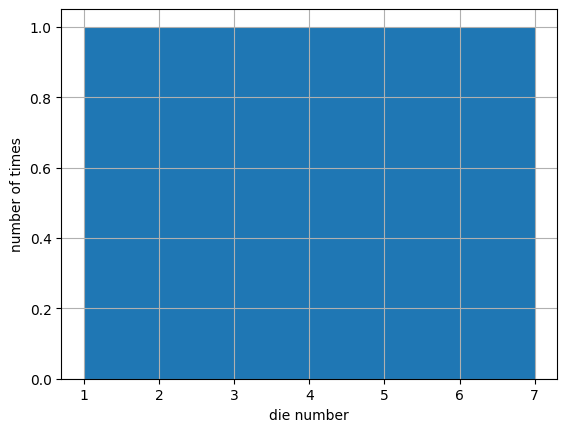

In [98]:
dado['number'].hist(bins = [1, 2, 3, 4, 5, 6, 7])
plt.ylabel('number of times')
plt.xlabel('die number')
plt.show()

Cada número tiene 1/6 o 17% de probabilidad de ser seleccionado

In [99]:
# We create probability distribution
number_dist = dado.groupby('number').count() / len(dado)

# We reset index and rename columns
number_dist = number_dist.reset_index()
number_dist.columns = ['number', 'prob']

number_dist

,number,prob
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


El valor esperado del dado es 3.5

In [100]:
np.mean(dado['number'])

np.float64(3.5)

Podemos hacer un muestreo con reemplazo para simular 10 lanzamientos del dado y ver cómo cambia la distribución.


In [101]:
rolls_10 = dado.sample(10, replace = True)
rolls_10

,number,times
4,5,1
3,4,1
2,3,1
5,6,1
4,5,1
1,2,1
3,4,1
5,6,1
5,6,1
1,2,1


Visualizamos la distribución y calculamos la media de la muestra, observamos que la media de la muestra no es el valor esperado, pero está cerca.

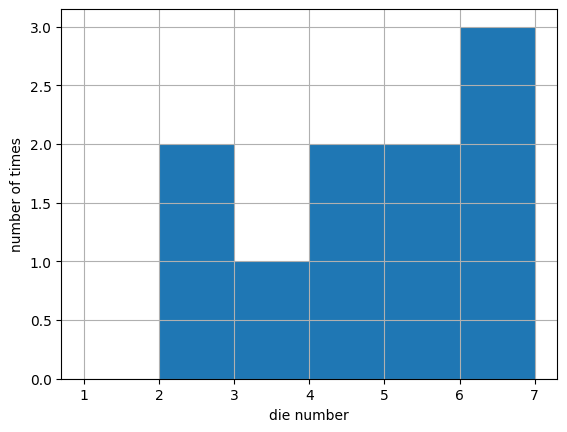

In [102]:
rolls_10['number'].hist(bins = np.linspace(1, 7, 7))
plt.ylabel('number of times')
plt.xlabel('die number')
plt.show()

In [103]:
np.mean(rolls_10['number'])

np.float64(4.3)

¿Qué pasaría si tuviéramos 100 lanzamientos en lugar de solo 10? Vamos a ver...

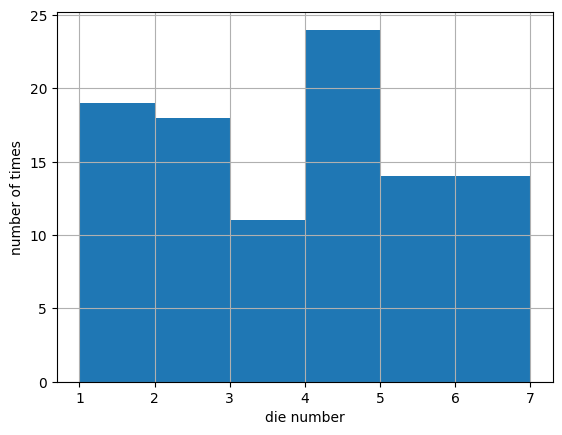

In [104]:
rolls_100 = dado.sample(100, replace = True)

rolls_100['number'].hist(bins = np.linspace(1, 7, 7))
plt.ylabel('number of times')
plt.xlabel('die number')
plt.show()

La distribución se parecería más a una distribución uniforme y la media de la muestra se acercaría más al valor esperado.


In [105]:
np.mean(rolls_100['number'])

np.float64(3.38)

Que tal si hacemos 1000 lanzamientos?

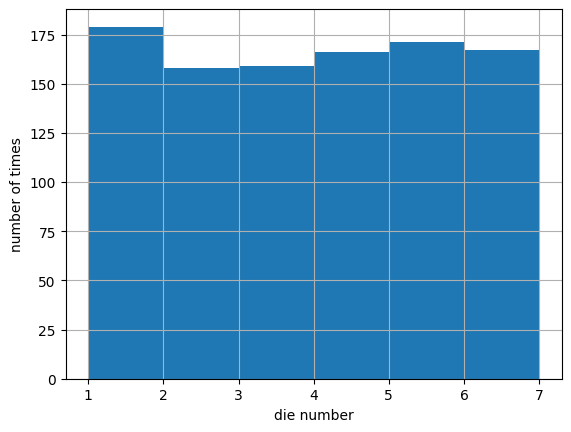

In [106]:
rolls_1000 = dado.sample(1000, replace = True)

rolls_1000['number'].hist(bins = np.linspace(1, 7, 7))
plt.ylabel('number of times')
plt.xlabel('die number')
plt.show()

In [107]:
np.mean(rolls_1000['number'])

np.float64(3.493)

Observamos que la media de la muestra ahora está aún más cerca de la media esperada, estamos viendo la **Ley de los Grandes Números** en acción. La **Ley de los Grandes Números** establece que a medida que el tamaño de la muestra de un experimento aleatorio aumenta, el promedio de los valores observados converge a la media esperada (teórica), indicando que las muestras grandes proporcionan estimaciones más precisas de los parámetros de la población. ¿Qué crees que pasaría si muestreamos 10000 veces?

## <a id='3.2.'> 13.2 Distribuciones de probabilidad continuas </a>

Las distribuciones de probabilidad continuas describen la probabilidad de obtener cualquier valor específico dentro de un rango continuo de posibles resultados. A diferencia de las distribuciones discretas, manejan posibilidades infinitas y se caracterizan por las Funciones de Densidad de Probabilidad (PDFs), que representan la densidad de probabilidad en cada punto. La Función de Distribución Acumulativa (CDF) asociada con estas distribuciones da la probabilidad de que una variable aleatoria sea menor o igual a un valor específico. Ejemplos comunes incluyen la distribución normal y la distribución exponencial.

### <a id='3.2.1'> Distribución uniforme continua </a> 

La distribución uniforme continua representa resultados donde cualquier valor dentro de un rango continuo especificado es igualmente probable. Se define por dos parámetros: los valores mínimo y máximo del rango.


[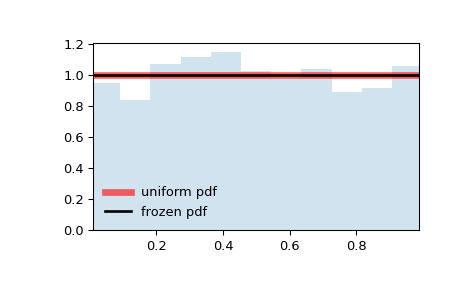](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform)

In [108]:
>>> from scipy.stats import uniform

Supongamos que estamos esperando en la fila para un autobús y tiene la misma probabilidad de llegar en cualquier momento entre las 12:00 pm y las 12:15 pm. Calculemos algunas probabilidades utilizando `cdf` (función de distribución acumulativa).

La probabilidad de que el autobús llegue en cualquier momento durante esos 15 minutos siempre será uno, ya que es la suma de todas las probabilidades:


In [109]:
uniform.cdf(15, 0, 15)

np.float64(1.0)

La probabilidad de que el autobús llegue durante los primeros siete minutos:


In [110]:
uniform.cdf(7, 0, 15)

np.float64(0.4666666666666667)

¿Qué hay de la probabilidad de esperar más de cuatro minutos pero menos de siete?


In [111]:
uniform.cdf(7, 0, 15) - uniform.cdf(4, 0, 15)

np.float64(0.2)

Ahora, generemos valores aleatorios usando la distribución uniforme con la función `rvs`. Ponemos como entrada el valor mínimo, el valor máximo y luego el tamaño de la muestra.


In [112]:
uniform.rvs(0, 15, size = 15)

array([ 4.52066811, 11.2141407 ,  7.54080585,  3.48319043, 13.4936186 ,
        5.75836832,  8.15329292, 13.59708166,  9.36356994,  1.75347061,
       14.09748185,  9.4156208 ,  5.02358422,  2.08908109, 11.91037784])

Si quieres que nuestra muestra sea replicable, no olvides añadir una semilla aleatoria.


In [113]:
np.random.seed(42)
uniform.rvs(0, 15, size = 15)

array([ 5.61810178, 14.2607146 , 10.97990913,  8.97987726,  2.34027961,
        2.33991781,  0.87125418, 12.99264219,  9.01672518, 10.62108867,
        0.30876741, 14.54864778, 12.48663961,  3.18508666,  2.72737451])

Ahora, otro ejemplo. Tu computadora necesita una actualización y podría reiniciarse en cualquier momento en los próximos 30 minutos. Nuevamente, calculemos algunas probabilidades utilizando `cdf`.


In [114]:
# What is the probability of waiting less than 5 mins ? 
prob_less_5 = uniform.cdf(5, 0, 30)
print(prob_less_5)

0.16666666666666666


In [115]:
# What is the probability of waiting more than 5 mins ? 
prob_more_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_less_5)

0.16666666666666666


In [116]:
# What is the probability of waiting more than 10 mins and less than 20 ? 
prob_more_10_less_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_more_10_less_20)

0.3333333333333333


Ahora podemos generar 10000 muestras del tiempo de espera. Al trazar las muestras en un histograma, podemos ver fácilmente que sigue una distribución uniforme continua.


In [117]:
# We generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=10000)

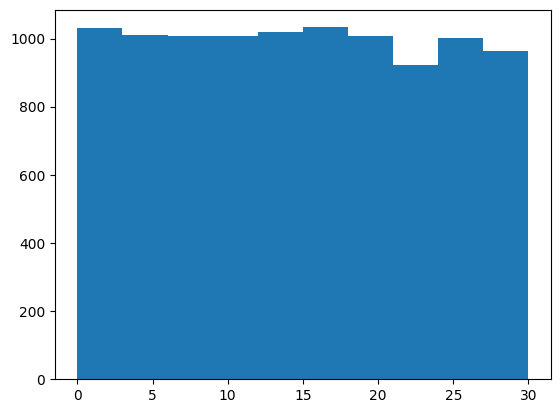

In [118]:
# We create a histogram of simulated times
plt.hist(wait_times)
plt.show()

### <a id='3.2.2'> Distribución binomial </a> 
La distribución binomial modela el número de éxitos en un número fijo de ensayos de Bernoulli independientes, cada uno con la misma probabilidad de éxito. Se caracteriza por dos parámetros: el número de ensayos y la probabilidad de éxito en cada ensayo.


[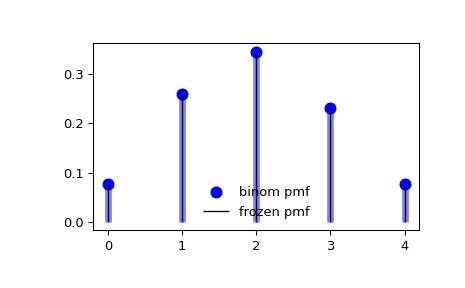](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)

In [119]:
>>> from scipy.stats import binom

Simulemos diferentes lanzamientos de una moneda.


In [120]:
# We flip 1 coin with a 50% chance of success, one time
binom.rvs(1, 0.5, size= 1)

array([0])

In [121]:
# We flip 1 coin with a 50% chance of success, ten times
binom.rvs(1, 0.5, size= 10)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

Podemos intercambiar el primer y el último argumento. El resultado nos dará la suma de éxitos.


In [122]:
# We flip 10 coins with a 50% chance of success, one time each coin
binom.rvs(10, 0.5, size= 1)

array([7])

Si establecemos 3 como el primer argumento y el tamaño en 5, entonces estamos lanzando 3 monedas, 5 veces cada una. Devuelve 5 números, que representan el número de caras entre las 3 monedas en cada lanzamiento.


In [123]:
# We flip 3 coins with a 50% chance of success, ten times each coin
binom.rvs(3, 0.5, size= 10)

array([3, 2, 2, 0, 3, 3, 3, 2, 1, 3])

También podemos hacer que un lado sea más pesado que el otro, lo que significa que un resultado será más probable que el otro. Supongamos que el lado de las caras es más pesado. En lugar de un 50% de probabilidad, ahora tenemos un 75% de probabilidad de obtener caras. El resultado tendrá números más altos, ya que ahora es más probable obtener un éxito (caras).


In [124]:
binom.rvs(3, 0.75, size= 10)

array([3, 2, 3, 1, 3, 3, 2, 2, 2, 3])

Podemos hacer lo contrario, haciendo que el lado de las cruces sea más probable. En lugar de un 50% de probabilidad, ahora tenemos un 25% de probabilidad de obtener caras. El resultado tendrá números más bajos, ya que ahora es más probable obtener un fallo (cruces).

In [125]:
binom.rvs(3, 0.25, size= 10)

array([0, 1, 3, 1, 1, 2, 0, 1, 1, 1])

Podemos ver la distribución de lanzar 10 monedas varias veces con una probabilidad del 50% de obtener caras. La mayoría de los resultados se ubicarán en el medio. El valor esperado en la distribución binomial es $n \times p$, lo que en este caso significa $10 \times 0.5 = 5$.


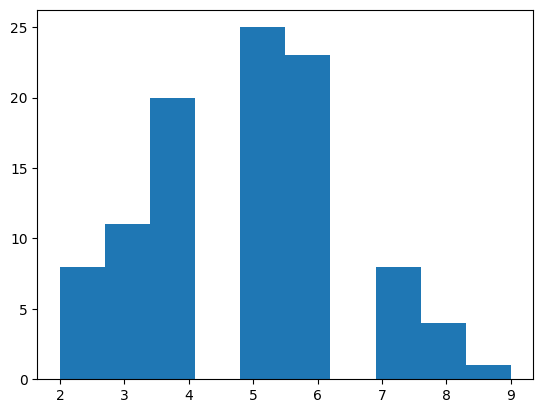

In [126]:
flips = binom.rvs(10, 0.5, size= 100)
plt.hist(flips)
plt.show()

Para obtener la probabilidad de éxitos dado un número de ensayos, podemos usar `binom.pmf`, que se refiere a la Función de Masa de Probabilidad (PMF) para una distribución binomial con el primer argumento siendo el número de caras, el segundo, el número de ensayos y el tercero, la probabilidad de éxito.

Podemos usar `binom.cdf` para calcular la probabilidad de que una variable aleatoria binomial sea menor o igual a un valor especificado.


¿Cuál sería la probabilidad de obtener 7 caras en 10 lanzamientos?


In [127]:
# binom.pmf( # heads, # trials, prob of success)
binom.pmf(7, 10, 0.5)

np.float64(0.11718749999999996)

¿Y la probabilidad de obtener 7 o menos caras en 10 lanzamientos?


In [128]:
# binom.cdf( # heads, # trials, prob of success)
binom.cdf(7, 10, 0.5)

np.float64(0.9453125)

¿Qué tal la probabilidad de obtener más de 7 caras?

In [129]:
1 - binom.cdf(7, 10, 0.5)

np.float64(0.0546875)

### <a id='3.2.3'> Distribución normal </a> 
La distribución normal modela una distribución de probabilidad continua donde los datos tienden a agruparse alrededor de una media central, siguiendo una curva en forma de campana. Se caracteriza por dos parámetros: la media $(\mu)$ que representa la tendencia central y la desviación estándar $(\sigma)$ que determina la dispersión o el grado de dispersión de los datos. Aproximadamente el 68% de los datos se encuentran dentro de una desviación estándar de la media, el 95% dentro de dos desviaciones estándar y el 99.7% dentro de tres desviaciones estándar. Las colas de la distribución se extienden infinitamente en ambas direcciones, disminuyendo gradualmente en densidad de probabilidad. El área total bajo la curva es 1, reflejando la probabilidad de que un valor elegido al azar se encuentre dentro de la distribución. Debido al Teorema del Límite Central, muchos fenómenos del mundo real tienden a exhibir una distribución normal, lo que refuerza su amplia aplicabilidad en el análisis estadístico.


[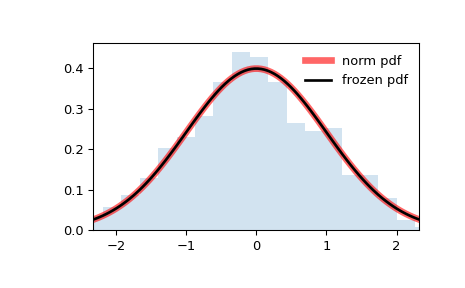](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

In [130]:
>>> from scipy.stats import norm

Volvamos al dataframe `deals`. Dado que cada negocio fue diferente, generaron diferentes cantidades de dinero, las cuales están almacenadas en la columna `amount`. Determinemos la probabilidad de vender diferentes montos, pero primero, veamos qué distribución sigue la columna `amount`.


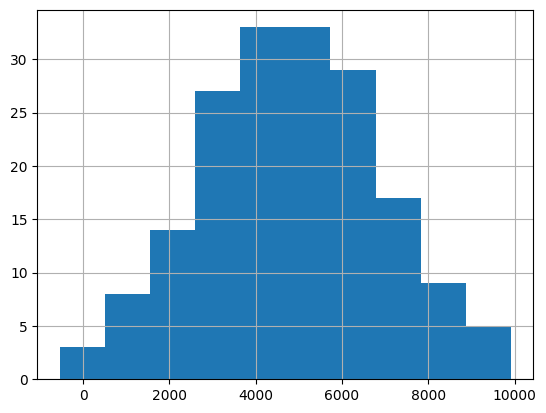

In [131]:
# Let's create a histogram of the amount column
deals['amount'].hist(bins=10)
plt.show()

In [132]:
# We define the mean and std
mean = deals['amount'].mean()
std = deals['amount'].std()

¿Cuál es la probabilidad de que un negocio se cierre con menos de \$6500?


In [133]:
norm.cdf(6500, mean, std)

np.float64(0.7939331610978386)

¿Cuál es la probabilidad de que un negocio se cierre con más de \$1000?


In [134]:
1 - norm.cdf(1000, mean, std)

np.float64(0.9679962803797578)

¿Cuál es la probabilidad de que un negocio valga entre 1000 y 6500?


In [135]:
norm.cdf(6500, mean, std) - norm.cdf(1000, mean, std)

np.float64(0.7619294414775964)

Calcula el monto por debajo del cual se cerrarán el 50% de los negocios.


In [136]:
norm.ppf(0.50, mean, std)

np.float64(4812.000337078652)

Ahora podemos generar valores aleatorios con la media y la desviación estándar. Luego, podemos graficarlos para ver su distribución.


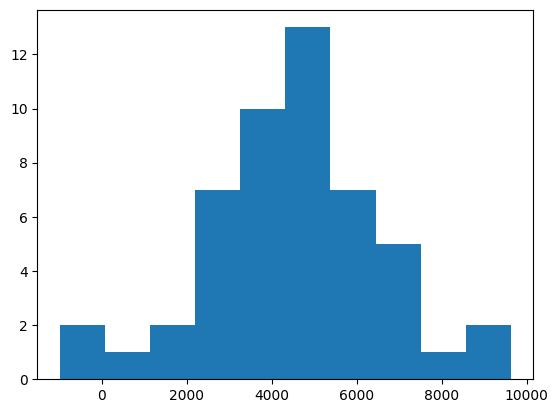

In [137]:
sales = norm.rvs(mean, std, size= 50)

plt.hist(sales)
plt.show()

Para ver más sobre otras distribuciones de probabilidad disponibles en `scipy.stats` puedes ir a:
https://docs.scipy.org/doc/scipy/reference/stats.html